In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 AI-Powered Financial Health Analyzer")
print("=" * 50)

🔍 AI-Powered Financial Health Analyzer


In [2]:
##### User Financial Data Input
def get_user_financial_data():
    """
    Collect user's financial information including income and detailed expenses
    """
    print("📊 Please enter your financial details:")
    
    # Income
    monthly_income = float(input("Enter your monthly take-home income: ₹"))
    
    print("\n💸 Now enter your monthly expenses:")
    
    # Fixed Expenses
    rent_emi = float(input("Rent/EMI: ₹"))
    utilities = float(input("Utilities (Electricity, Water, Gas): ₹"))
    internet_phone = float(input("Internet/Phone: ₹"))
    loan_repayments = float(input("Loan Repayments: ₹"))
    insurance = float(input("Insurance: ₹"))
    subscriptions = float(input("Subscriptions: ₹"))
    
    # Variable Expenses
    groceries = float(input("Groceries: ₹"))
    dining_entertainment = float(input("Dining & Entertainment: ₹"))
    transportation = float(input("Transportation: ₹"))
    shopping = float(input("Shopping: ₹"))
    miscellaneous = float(input("Miscellaneous: ₹"))
    
    # Investment preference
    investment_percentage = float(input("\nWhat percentage of income do you want to invest? (%) "))
    
    return {
        'monthly_income': monthly_income,
        'expenses': {
            'rent_emi': rent_emi,
            'utilities': utilities,
            'internet_phone': internet_phone,
            'loan_repayments': loan_repayments,
            'insurance': insurance,
            'subscriptions': subscriptions,
            'groceries': groceries,
            'dining_entertainment': dining_entertainment,
            'transportation': transportation,
            'shopping': shopping,
            'miscellaneous': miscellaneous
        },
        'investment_percentage': investment_percentage
    }

# Get user data
user_data = get_user_financial_data()

📊 Please enter your financial details:


Enter your monthly take-home income: ₹ 45000



💸 Now enter your monthly expenses:


Rent/EMI: ₹ 5000
Utilities (Electricity, Water, Gas): ₹ 1000
Internet/Phone: ₹ 500
Loan Repayments: ₹ 12000
Insurance: ₹ 200
Subscriptions: ₹ 799
Groceries: ₹ 4500
Dining & Entertainment: ₹ 6000
Transportation: ₹ 3000
Shopping: ₹ 5000
Miscellaneous: ₹ 1500

What percentage of income do you want to invest? (%)  15


In [3]:
class FinancialAnalyzer:
    def __init__(self, user_data):
        self.user_data = user_data
        self.monthly_income = user_data['monthly_income']
        self.expenses = user_data['expenses']
        self.investment_pct = user_data['investment_percentage']
        
    def calculate_financial_metrics(self):
        """Calculate key financial metrics"""
        # Total expenses
        total_expenses = sum(self.expenses.values())
        
        # Monthly savings
        monthly_savings = self.monthly_income - total_expenses
        
        # Desired investment amount
        desired_investment = self.monthly_income * (self.investment_pct / 100)
        
        # Savings rate
        savings_rate = (monthly_savings / self.monthly_income) * 100
        
        # Expense ratios
        expense_ratios = {category: (amount / self.monthly_income) * 100 
                         for category, amount in self.expenses.items()}
        
        return {
            'total_expenses': total_expenses,
            'monthly_savings': monthly_savings,
            'desired_investment': desired_investment,
            'savings_rate': savings_rate,
            'expense_ratios': expense_ratios
        }
    
    def generate_spending_alerts(self):
        """Generate alerts for high spending categories"""
        metrics = self.calculate_financial_metrics()
        expense_ratios = metrics['expense_ratios']
        
        alerts = []
        
        # Define spending thresholds
        high_spending_threshold = 35  # % of income
        warning_threshold = 25        # % of income
        
        for category, ratio in expense_ratios.items():
            if ratio >= high_spending_threshold:
                alerts.append({
                    'category': category,
                    'severity': 'HIGH',
                    'message': f"🚨 CRITICAL: {category.replace('_', ' ').title()} is {ratio:.1f}% of your income!",
                    'suggestion': "Consider finding ways to reduce this expense significantly."
                })
            elif ratio >= warning_threshold:
                alerts.append({
                    'category': category,
                    'severity': 'MEDIUM',
                    'message': f"⚠️ WARNING: {category.replace('_', ' ').title()} is {ratio:.1f}% of your income.",
                    'suggestion': "Monitor this expense closely."
                })
        
        # Overall savings alert
        if metrics['savings_rate'] < 10:
            alerts.append({
                'category': 'savings_rate',
                'severity': 'HIGH',
                'message': f"🚨 LOW SAVINGS: You're saving only {metrics['savings_rate']:.1f}% of your income.",
                'suggestion': "Aim to save at least 20% of your income for financial security."
            })
        
        # Investment feasibility alert
        if metrics['desired_investment'] > metrics['monthly_savings']:
            alerts.append({
                'category': 'investment_feasibility',
                'severity': 'HIGH',
                'message': f"⚠️ INVESTMENT ALERT: You want to invest ₹{metrics['desired_investment']:.0f}, but only save ₹{metrics['monthly_savings']:.0f}.",
                'suggestion': "Consider adjusting your investment target or reducing expenses."
            })
            
        return alerts
    
    def generate_income_analysis(self, period_months=12):
        """Generate income analysis for different time periods"""
        metrics = self.calculate_financial_metrics()
        
        # Calculate for different periods
        analysis = {}
        
        periods = {
            'Monthly': 1,
            '6 Months': 6,
            'Annual': 12
        }
        
        for period_name, months in periods.items():
            analysis[period_name] = {
                'Income': self.monthly_income * months,
                'Total Expenses': metrics['total_expenses'] * months,
                'Total Savings': metrics['monthly_savings'] * months,
                'Potential Investment': metrics['desired_investment'] * months,
                'Savings Rate': metrics['savings_rate']  # Percentage remains same
            }
        
        return analysis

# Initialize analyzer
analyzer = FinancialAnalyzer(user_data)
metrics = analyzer.calculate_financial_metrics()

In [4]:
# Sample Mutual Fund Returns Data (You can expand this database)
def get_mutual_fund_returns_data():
    """
    Returns sample mutual fund data with historical returns
    In real implementation, you would fetch this from an API
    """
    mf_data = {
        'Category': ['Large Cap', 'Large Cap', 'Flexi Cap', 'Flexi Cap', 'ELSS', 'ELSS', 
                    'Mid Cap', 'Mid Cap', 'Small Cap', 'Small Cap', 'Hybrid', 'Hybrid',
                    'Debt', 'Debt', 'Index', 'Index'],
        'Fund_Name': ['ABC Bluechip Fund', 'XYZ Large Cap Fund', 'PQR Flexi Cap Fund', 
                     'LMN Dynamic Fund', 'Tax Saver Pro', 'Future Growth ELSS',
                     'Mid Cap Opportunities', 'Emerging Stars Fund', 'Small Cap Champion',
                     'Micro Marvel Fund', 'Balanced Advantage', 'Hybrid Wealth',
                     'Corporate Bond Fund', 'Gilt Fund', 'Nifty 50 Index', 'Sensex Index'],
        '1_Year_Return': [12.5, 11.8, 15.2, 14.7, 16.3, 15.8, 18.9, 20.1, 22.5, 24.3, 11.2, 10.8, 7.8, 8.2, 12.1, 11.9],
        '3_Year_CAGR': [14.2, 13.8, 16.5, 15.9, 17.2, 16.8, 19.5, 20.8, 23.1, 25.2, 12.1, 11.7, 8.5, 8.9, 13.8, 13.5],
        '5_Year_CAGR': [13.8, 13.2, 15.8, 15.2, 16.5, 16.1, 18.2, 19.1, 21.5, 23.8, 11.5, 11.2, 8.2, 8.5, 13.2, 12.9],
        'Risk_Level': ['Medium', 'Medium', 'Medium-High', 'Medium-High', 'High', 'High',
                      'High', 'High', 'Very High', 'Very High', 'Low-Medium', 'Low-Medium',
                      'Low', 'Low', 'Medium', 'Medium']
    }
    
    return pd.DataFrame(mf_data)

# Get mutual fund data
mf_df = get_mutual_fund_returns_data()

In [5]:
def create_comprehensive_report(analyzer, mf_data):
    """Generate a comprehensive financial health report"""
    
    metrics = analyzer.calculate_financial_metrics()
    alerts = analyzer.generate_spending_alerts()
    income_analysis = analyzer.generate_income_analysis()
    
    print("\n" + "="*70)
    print("📈 AI-POWERED FINANCIAL HEALTH ANALYSIS REPORT")
    print("="*70)
    
    # Basic Financial Summary
    print(f"\n💼 BASIC FINANCIAL SUMMARY:")
    print(f"   Monthly Income:      ₹{analyzer.monthly_income:,.2f}")
    print(f"   Total Expenses:      ₹{metrics['total_expenses']:,.2f}")
    print(f"   Monthly Savings:     ₹{metrics['monthly_savings']:,.2f}")
    print(f"   Savings Rate:        {metrics['savings_rate']:.1f}%")
    print(f"   Desired Investment:  ₹{metrics['desired_investment']:,.2f} ({analyzer.investment_pct}% of income)")
    
    # Income Analysis across time periods
    print(f"\n📅 INCOME ANALYSIS ACROSS TIME PERIODS:")
    income_df = pd.DataFrame(income_analysis).T
    print(income_df.round(2))
    
    # Spending Alerts
    print(f"\n🚨 SPENDING ALERTS & RECOMMENDATIONS:")
    if alerts:
        for alert in alerts:
            print(f"   • {alert['message']}")
            print(f"     💡 Suggestion: {alert['suggestion']}")
    else:
        print("   ✅ No critical spending issues detected. Your budget looks healthy!")
    
    # Expense Breakdown
    print(f"\n💸 EXPENSE BREAKDOWN (% of Income):")
    for category, ratio in metrics['expense_ratios'].items():
        print(f"   {category.replace('_', ' ').title():<20}: {ratio:5.1f}%")
    
    return metrics, alerts, income_analysis

# Generate the report
metrics, alerts, income_analysis = create_comprehensive_report(analyzer, mf_df)


📈 AI-POWERED FINANCIAL HEALTH ANALYSIS REPORT

💼 BASIC FINANCIAL SUMMARY:
   Monthly Income:      ₹45,000.00
   Total Expenses:      ₹39,499.00
   Monthly Savings:     ₹5,501.00
   Savings Rate:        12.2%
   Desired Investment:  ₹6,750.00 (15.0% of income)

📅 INCOME ANALYSIS ACROSS TIME PERIODS:
            Income  Total Expenses  Total Savings  Potential Investment  \
Monthly    45000.0         39499.0         5501.0                6750.0   
6 Months  270000.0        236994.0        33006.0               40500.0   
Annual    540000.0        473988.0        66012.0               81000.0   

          Savings Rate  
Monthly          12.22  
6 Months         12.22  
Annual           12.22  

🚨 SPENDING ALERTS & RECOMMENDATIONS:
   • ⚠️ WARNING: Loan Repayments is 26.7% of your income.
     💡 Suggestion: Monitor this expense closely.
   • ⚠️ INVESTMENT ALERT: You want to invest ₹6750, but only save ₹5501.
     💡 Suggestion: Consider adjusting your investment target or reducing expense

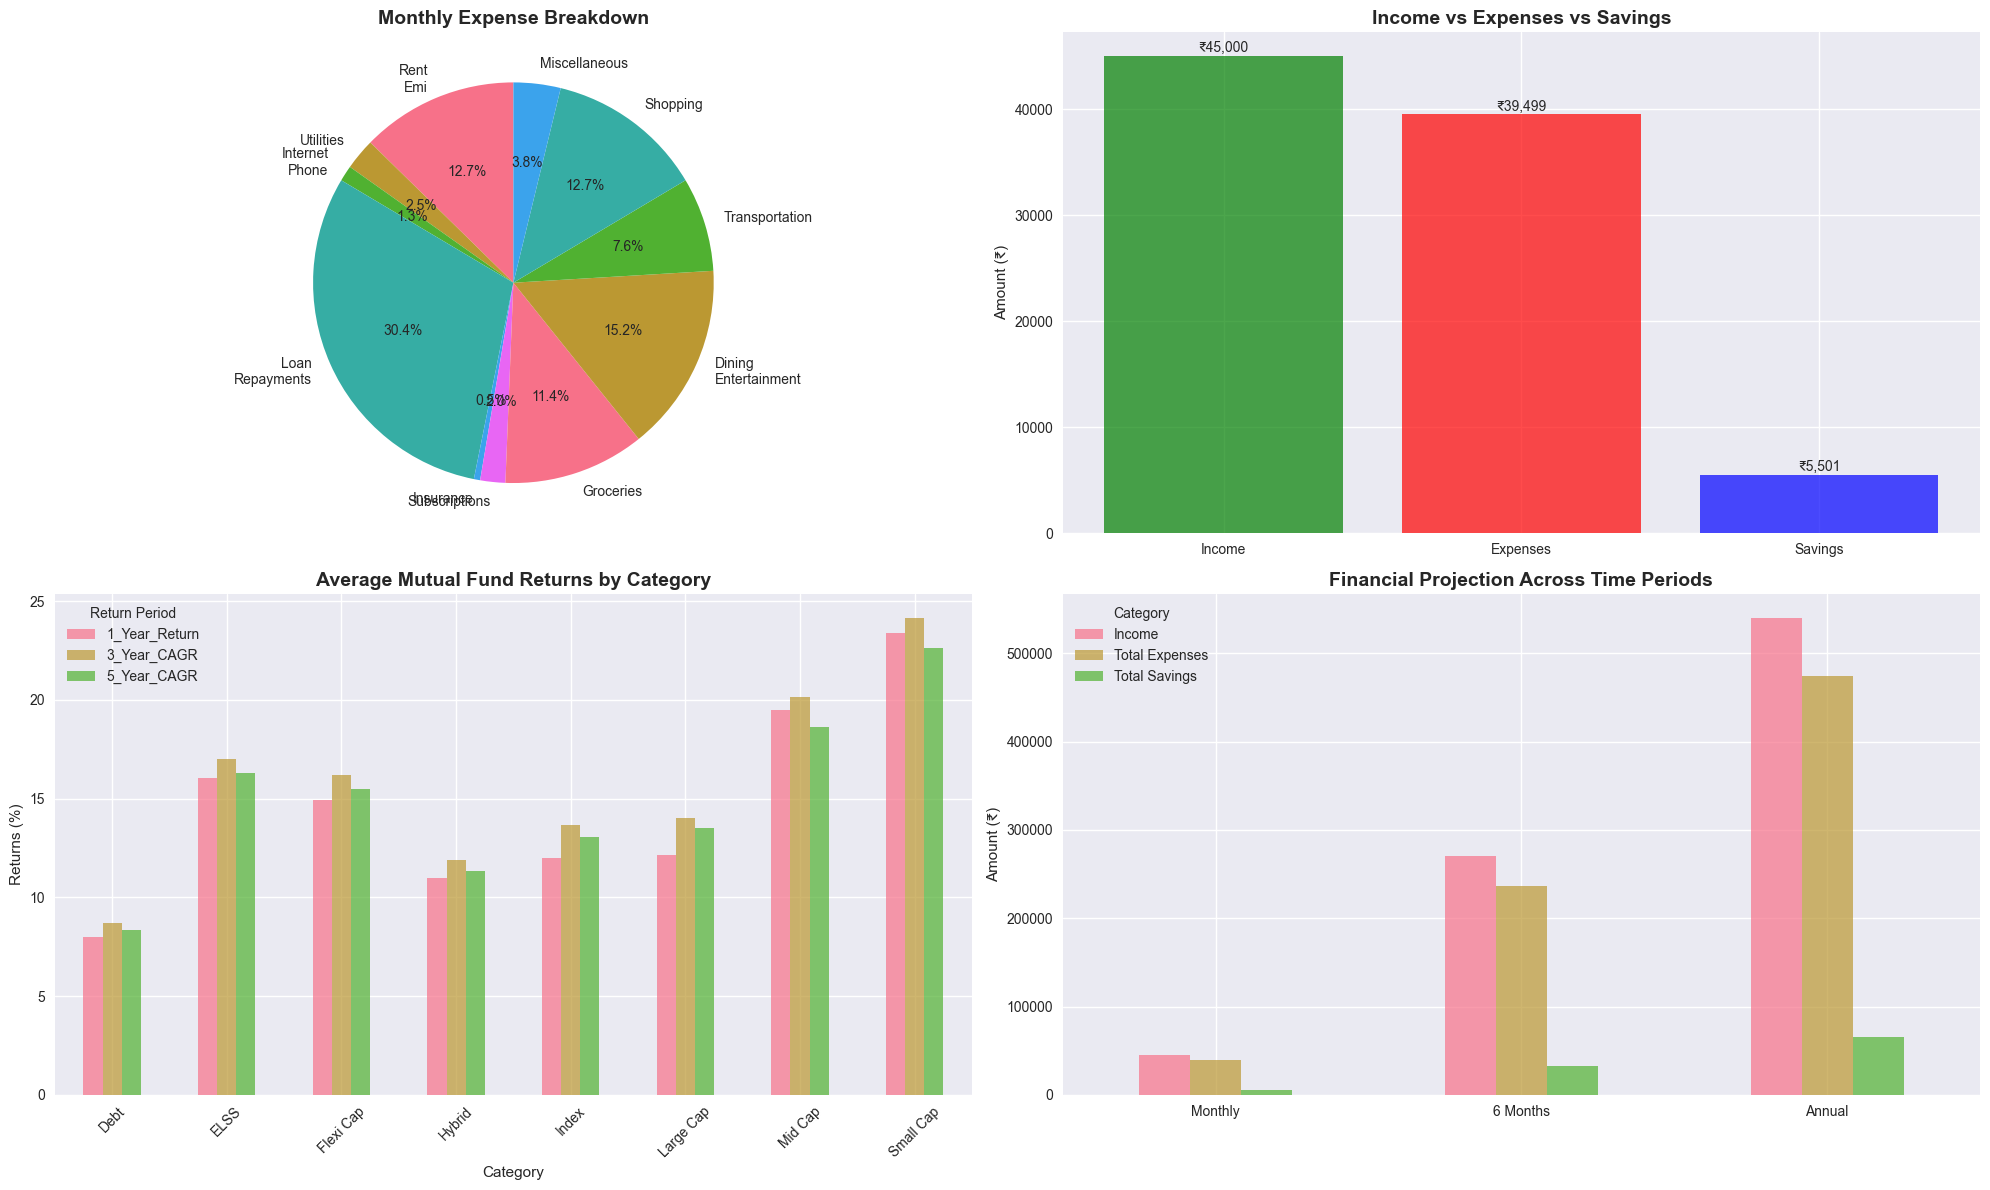

In [6]:
# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Expense Breakdown Pie Chart
expense_categories = list(analyzer.expenses.keys())
expense_amounts = list(analyzer.expenses.values())
expense_labels = [cat.replace('_', '\n').title() for cat in expense_categories]

ax1.pie(expense_amounts, labels=expense_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Monthly Expense Breakdown', fontsize=14, fontweight='bold')

# 2. Income vs Expenses Bar Chart
categories = ['Income', 'Expenses', 'Savings']
amounts = [analyzer.monthly_income, metrics['total_expenses'], metrics['monthly_savings']]
colors = ['green', 'red', 'blue']

bars = ax2.bar(categories, amounts, color=colors, alpha=0.7)
ax2.set_title('Income vs Expenses vs Savings', fontsize=14, fontweight='bold')
ax2.set_ylabel('Amount (₹)')

# Add value labels on bars
for bar, amount in zip(bars, amounts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'₹{amount:,.0f}', ha='center', va='bottom')

# 3. Mutual Fund Category Performance
category_performance = mf_df.groupby('Category')[['1_Year_Return', '3_Year_CAGR', '5_Year_CAGR']].mean()
category_performance.plot(kind='bar', ax=ax3, alpha=0.7)
ax3.set_title('Average Mutual Fund Returns by Category', fontsize=14, fontweight='bold')
ax3.set_ylabel('Returns (%)')
ax3.legend(title='Return Period')
ax3.tick_params(axis='x', rotation=45)

# 4. Income Analysis Over Time
periods_analysis = pd.DataFrame(income_analysis).T[['Income', 'Total Expenses', 'Total Savings']]
periods_analysis.plot(kind='bar', ax=ax4, alpha=0.7)
ax4.set_title('Financial Projection Across Time Periods', fontsize=14, fontweight='bold')
ax4.set_ylabel('Amount (₹)')
ax4.legend(title='Category')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [7]:
# Mutual Fund Returns Analysis
print("\n" + "="*70)
print("📊 MUTUAL FUND RETURNS ANALYSIS (For Information Only)")
print("="*70)

# Show category-wise average returns
print(f"\n📈 AVERAGE RETURNS BY FUND CATEGORY:")
category_avg = mf_df.groupby('Category').agg({
    '1_Year_Return': 'mean',
    '3_Year_CAGR': 'mean', 
    '5_Year_CAGR': 'mean',
    'Risk_Level': 'first'
}).round(2)

print(category_avg)

# Show top performing funds in each category
print(f"\n🏆 TOP PERFORMING FUNDS IN EACH CATEGORY (1-Year Return):")
top_funds = mf_df.loc[mf_df.groupby('Category')['1_Year_Return'].idxmax()]
display(top_funds[['Category', 'Fund_Name', '1_Year_Return', '3_Year_CAGR', '5_Year_CAGR', 'Risk_Level']])

# Risk-Return Analysis
print(f"\n⚖️ RISK-RETURN ANALYSIS:")
risk_groups = mf_df.groupby('Risk_Level').agg({
    '1_Year_Return': ['mean', 'std'],
    '3_Year_CAGR': ['mean', 'std'],
    '5_Year_CAGR': ['mean', 'std']
}).round(2)

print(risk_groups)


📊 MUTUAL FUND RETURNS ANALYSIS (For Information Only)

📈 AVERAGE RETURNS BY FUND CATEGORY:
           1_Year_Return  3_Year_CAGR  5_Year_CAGR   Risk_Level
Category                                                       
Debt                8.00         8.70         8.35          Low
ELSS               16.05        17.00        16.30         High
Flexi Cap          14.95        16.20        15.50  Medium-High
Hybrid             11.00        11.90        11.35   Low-Medium
Index              12.00        13.65        13.05       Medium
Large Cap          12.15        14.00        13.50       Medium
Mid Cap            19.50        20.15        18.65         High
Small Cap          23.40        24.15        22.65    Very High

🏆 TOP PERFORMING FUNDS IN EACH CATEGORY (1-Year Return):


,Category,Fund_Name,1_Year_Return,3_Year_CAGR,5_Year_CAGR,Risk_Level
13,Debt,Gilt Fund,8.2,8.9,8.5,Low
4,ELSS,Tax Saver Pro,16.3,17.2,16.5,High
2,Flexi Cap,PQR Flexi Cap Fund,15.2,16.5,15.8,Medium-High
10,Hybrid,Balanced Advantage,11.2,12.1,11.5,Low-Medium
14,Index,Nifty 50 Index,12.1,13.8,13.2,Medium
0,Large Cap,ABC Bluechip Fund,12.5,14.2,13.8,Medium
7,Mid Cap,Emerging Stars Fund,20.1,20.8,19.1,High
9,Small Cap,Micro Marvel Fund,24.3,25.2,23.8,Very High



⚖️ RISK-RETURN ANALYSIS:
            1_Year_Return       3_Year_CAGR       5_Year_CAGR      
                     mean   std        mean   std        mean   std
Risk_Level                                                         
High                17.77  2.06       18.58  1.90       17.48  1.42
Low                  8.00  0.28        8.70  0.28        8.35  0.21
Low-Medium          11.00  0.28       11.90  0.28       11.35  0.21
Medium              12.08  0.31       13.82  0.29       13.28  0.38
Medium-High         14.95  0.35       16.20  0.42       15.50  0.42
Very High           23.40  1.27       24.15  1.48       22.65  1.63


In [8]:
# Investment Projection Calculator
def investment_projection_calculator(monthly_investment, years=10, expected_return=12):
    """
    Project future value of investments
    """
    monthly_rate = expected_return / 100 / 12
    months = years * 12
    
    future_value = monthly_investment * (((1 + monthly_rate) ** months - 1) / monthly_rate)
    total_invested = monthly_investment * months
    estimated_returns = future_value - total_invested
    
    return {
        'future_value': future_value,
        'total_invested': total_invested,
        'estimated_returns': estimated_returns,
        'return_multiple': future_value / total_invested
    }

print("\n" + "="*70)
print("💰 INVESTMENT PROJECTION CALCULATOR")
print("="*70)

# Calculate projections for user's desired investment
monthly_investment = metrics['desired_investment']

if monthly_investment > 0:
    print(f"\nBased on your desired monthly investment of ₹{monthly_investment:,.0f}:")
    
    for years in [5, 10, 15, 20]:
        for return_rate in [10, 12, 15]:  # Different expected return scenarios
            projection = investment_projection_calculator(monthly_investment, years, return_rate)
            print(f"\n   📅 {years} years at {return_rate}% annual return:")
            print(f"      Total Invested:    ₹{projection['total_invested']:,.0f}")
            print(f"      Estimated Value:   ₹{projection['future_value']:,.0f}")
            print(f"      Potential Gains:   ₹{projection['estimated_returns']:,.0f}")
            print(f"      Money Multiple:    {projection['return_multiple']:.1f}x")
else:
    print("\n⚠️  You need to increase your savings to start investing!")


💰 INVESTMENT PROJECTION CALCULATOR

Based on your desired monthly investment of ₹6,750:

   📅 5 years at 10% annual return:
      Total Invested:    ₹405,000
      Estimated Value:   ₹522,700
      Potential Gains:   ₹117,700
      Money Multiple:    1.3x

   📅 5 years at 12% annual return:
      Total Invested:    ₹405,000
      Estimated Value:   ₹551,270
      Potential Gains:   ₹146,270
      Money Multiple:    1.4x

   📅 5 years at 15% annual return:
      Total Invested:    ₹405,000
      Estimated Value:   ₹597,878
      Potential Gains:   ₹192,878
      Money Multiple:    1.5x

   📅 10 years at 10% annual return:
      Total Invested:    ₹810,000
      Estimated Value:   ₹1,382,704
      Potential Gains:   ₹572,704
      Money Multiple:    1.7x

   📅 10 years at 12% annual return:
      Total Invested:    ₹810,000
      Estimated Value:   ₹1,552,761
      Potential Gains:   ₹742,761
      Money Multiple:    1.9x

   📅 10 years at 15% annual return:
      Total Invested:    ₹81

In [9]:
# Generate final actionable recommendations
print("\n" + "="*70)
print("💡 ACTIONABLE FINANCIAL RECOMMENDATIONS")
print("="*70)

recommendations = []

# Based on savings rate
if metrics['savings_rate'] < 15:
    recommendations.append("🚀 Increase your savings rate to at least 20% for better financial security")
elif metrics['savings_rate'] >= 20:
    recommendations.append("✅ Excellent savings rate! Consider increasing investments for wealth building")

# Based on investment feasibility
if metrics['desired_investment'] <= metrics['monthly_savings']:
    recommendations.append(f"💰 You can comfortably invest ₹{metrics['desired_investment']:,.0f} monthly as planned")
else:
    recommendations.append(f"🔧 Adjust your investment target or find ways to save an additional ₹{metrics['desired_investment'] - metrics['monthly_savings']:,.0f} monthly")

# Based on expense analysis
high_expense_categories = [cat for cat, ratio in metrics['expense_ratios'].items() if ratio > 25]
if high_expense_categories:
    for category in high_expense_categories:
        recommendations.append(f"📉 Review your {category.replace('_', ' ')} spending - it's {metrics['expense_ratios'][category]:.1f}% of your income")

# Based on mutual fund analysis
if metrics['desired_investment'] > 0:
    avg_equity_return = category_avg.loc[['Large Cap', 'Flexi Cap', 'Mid Cap'], '5_Year_CAGR'].mean()
    avg_debt_return = category_avg.loc[['Debt'], '5_Year_CAGR'].mean()
    
    recommendations.append(f"📊 Historical averages: Equity funds ~{avg_equity_return:.1f}%, Debt funds ~{avg_debt_return:.1f}% returns")
    recommendations.append("ℹ️  Remember: Past performance doesn't guarantee future returns")

# Print recommendations
for i, recommendation in enumerate(recommendations, 1):
    print(f"{i}. {recommendation}")

print("\n" + "="*70)
print("🎯 SUMMARY")
print("="*70)
print(f"Financial Health Score: {min(100, max(0, int(metrics['savings_rate'] * 3 + 40)))}/100")
print(f"Next Steps: {len(recommendations)} actionable items identified")
print(f"Recommended Focus: {'Increase Savings' if metrics['savings_rate'] < 20 else 'Wealth Building'}")
print("="*70)


💡 ACTIONABLE FINANCIAL RECOMMENDATIONS
1. 🚀 Increase your savings rate to at least 20% for better financial security
2. 🔧 Adjust your investment target or find ways to save an additional ₹1,249 monthly
3. 📉 Review your loan repayments spending - it's 26.7% of your income
4. 📊 Historical averages: Equity funds ~15.9%, Debt funds ~8.3% returns
5. ℹ️  Remember: Past performance doesn't guarantee future returns

🎯 SUMMARY
Financial Health Score: 76/100
Next Steps: 5 actionable items identified
Recommended Focus: Increase Savings


In [10]:
def calculate_advanced_metrics(self):
    # Emergency Fund Score
    emergency_fund_months = self.monthly_savings / self.monthly_income * 3
    
    # Debt-to-Income Ratio
    debt_to_income = (self.expenses['loan_repayments'] + self.expenses['rent_emi']) / self.monthly_income
    
    # Financial Freedom Number
    monthly_expenses_needed = self.monthly_income * 0.7  # 70% replacement
    fire_number = monthly_expenses_needed * 12 * 25  # 25x rule
    
    return {
        'emergency_fund_score': emergency_fund_months,
        'debt_to_income_ratio': debt_to_income,
        'financial_freedom_number': fire_number,
        'net_worth_tracker': None,  # Will be implemented
    }

In [11]:
GOAL_TEMPLATES = {
    'emergency_fund': {
        'target': '6 months expenses',
        'priority': 'HIGH',
        'timeline': '6-12 months',
        'suggested_saving_rate': '20% of income'
    },
    'down_payment': {
        'target': '20% of property value', 
        'priority': 'MEDIUM',
        'timeline': '2-5 years',
        'suggested_saving_rate': '15% of income'
    },
    'retirement': {
        'target': '25x annual expenses',
        'priority': 'HIGH',
        'timeline': '10+ years',
        'suggested_saving_rate': '15% of income'
    }
}

In [12]:
def emergency_fund_analyzer(self):
    required_emergency_fund = self.metrics['total_expenses'] * 6
    current_savings = float(input("Enter your current savings: ₹"))
    
    shortage = max(0, required_emergency_fund - current_savings)
    months_to_target = shortage / self.metrics['monthly_savings'] if self.metrics['monthly_savings'] > 0 else float('inf')
    
    return {
        'required_fund': required_emergency_fund,
        'current_savings': current_savings,
        'shortage': shortage,
        'months_to_target': months_to_target,
        'priority': 'CRITICAL' if shortage > 0 else 'ACHIEVED'
    }

In [13]:
class DebtPayoffStrategist:
    def __init__(self, debts):
        self.debts = debts  # List of {'name': 'Credit Card', 'balance': 50000, 'interest': 18, 'min_payment': 2000}
    
    def snowball_method(self):
        # Pay smallest debts first for psychological wins
        return sorted(self.debts, key=lambda x: x['balance'])
    
    def avalanche_method(self):
        # Pay highest interest debts first to save money
        return sorted(self.debts, key=lambda x: x['interest'], reverse=True)
    
    def calculate_payoff_timeline(self, extra_payment):
        # Calculate how long to pay off all debts
        pass

In [14]:
def tax_optimizer(self, income, investments, deductions):
    """
    Suggest tax-saving investments based on user's tax slab
    """
    tax_slabs = {
        'OLD_REGIME': [
            (250000, 0), (500000, 5), (1000000, 20), (float('inf'), 30)
        ],
        'NEW_REGIME': [
            (300000, 0), (600000, 5), (900000, 10), (1200000, 15),
            (1500000, 20), (float('inf'), 30)
        ]
    }
    
    # Suggest Section 80C, 80D, HRA optimizations
    tax_saving_options = {
        'ELSS': {'limit': 150000, 'lockin': 3},
        'PPF': {'limit': 150000, 'lockin': 15},
        'NPS': {'limit': 50000, 'lockin': 'Until 60'},
        'Health_Insurance': {'limit': 25000, 'lockin': 1}
    }

In [15]:
def inflation_adjuster(self, amount, years, inflation_rate=6):
    """
    Calculate future value considering inflation
    """
    future_value = amount * ((1 + inflation_rate/100) ** years)
    return {
        'current_value': amount,
        'future_value': future_value,
        'purchasing_power_loss': future_value - amount,
        'inflation_impact': f"₹{amount:,.0f} today = ₹{future_value:,.0f} in {years} years"
    }

In [16]:
def comprehensive_risk_assessment(self):
    questions = [
        {"question": "How would you react if your portfolio dropped 20%?", 
         "options": ["Sell everything", "Do nothing", "Buy more"],
         "scores": [1, 3, 5]},
        {"question": "Your investment time horizon?",
         "options": ["<2 years", "2-5 years", "5-10 years", "10+ years"],
         "scores": [1, 2, 4, 5]},
        # Add 8-10 more questions
    ]
    
    total_score = sum([q['scores'][user_answers[i]] for i, q in enumerate(questions)])
    
    risk_profiles = {
        (0, 12): 'Conservative',
        (13, 24): 'Moderate', 
        (25, 36): 'Growth',
        (37, 50): 'Aggressive'
    }
    
    return risk_profiles.get(total_score, 'Moderate')

In [17]:
def spending_pattern_detector(self, historical_data):
    """
    Analyze spending habits over time
    """
    patterns = {
        'lifestyle_creep': self.detect_lifestyle_creep(historical_data),
        'impulse_spending': self.analyze_impulse_purchases(),
        'subscription_overload': self.find_unused_subscriptions(),
        'peak_spending_days': self.identify_high_spend_days(),
        'category_trends': self.analyze_category_trends()
    }
    return patterns

def detect_lifestyle_creep(self, historical_data):
    # Check if expenses are growing faster than income
    income_growth = (current_income - past_income) / past_income
    expense_growth = (current_expenses - past_expenses) / past_expenses
    return expense_growth > income_growth

In [18]:
class BehavioralCoach:
    def __init__(self, user_data):
        self.user_data = user_data
    
    def common_biases_detector(self):
        biases = []
        
        # Loss Aversion - avoiding losses more than seeking gains
        if self.user_data['savings_rate'] < 10:
            biases.append("Loss Aversion - you might be overspending to avoid 'missing out'")
        
        # Present Bias - valuing immediate gratification
        if self.user_data['dining_entertainment'] / self.user_data['monthly_income'] > 15:
            biases.append("Present Bias - prioritizing current enjoyment over future security")
        
        return biases
    
    def generate_mindset_tips(self):
        return [
            "Pay yourself first - automate savings",
            "Every ₹100 saved today could be ₹1,000 in 20 years",
            "Small consistent investments beat timing the market",
            "Focus on what you can control - savings rate, not market returns"
        ]

In [19]:
class ProgressTracker:
    def __init__(self, user_id):
        self.user_id = user_id
        self.db_connection = self.connect_database()
    
    def save_monthly_snapshot(self):
        snapshot = {
            'timestamp': datetime.now(),
            'income': self.monthly_income,
            'expenses': self.expenses,
            'savings_rate': self.metrics['savings_rate'],
            'net_worth': self.calculate_net_worth(),
            'goal_progress': self.check_goal_progress()
        }
        # Save to database
    
    def generate_progress_report(self):
        # Show improvement over time
        historical_data = self.get_historical_data()
        return {
            'savings_rate_trend': self.analyze_trend(historical_data, 'savings_rate'),
            'net_worth_growth': self.calculate_growth_rate(historical_data, 'net_worth'),
            'debt_reduction': self.calculate_debt_paydown(historical_data),
            'milestones_achieved': self.get_milestones()
        }

In [20]:
def what_if_analyzer(self):
    scenarios = {
        'increase_savings_10pct': {
            'action': 'Increase savings rate by 10%',
            'impact': self.calculate_impact(increased_savings),
            'timeline_improvement': 'Retire 3 years earlier'
        },
        'reduce_dining_50pct': {
            'action': 'Cut dining out by 50%',
            'impact': self.calculate_savings_impact('dining_entertainment', 0.5),
            'annual_savings': self.expenses['dining_entertainment'] * 0.5 * 12
        },
        'side_income': {
            'action': 'Generate ₹10,000/month side income',
            'impact': self.calculate_side_income_impact(10000),
            'wealth_impact': 'Achieve goals 40% faster'
        }
    }
    return scenarios

In [21]:
# Security Modules
def fraud_prevention_tips(self):
    return [
        "Never share OTP or banking passwords",
        "Verify mutual fund statements directly with AMC",
        "Use 2FA for all financial accounts",
        "Check CIBIL score regularly for unauthorized accounts"
    ]

# Financial Literacy Content
EDUCATIONAL_CONTENT = {
    'beginner': [
        "Compound Interest: The 8th Wonder of the World",
        "Emergency Fund: Your Financial Safety Net",
        "Diversification: Don't Put All Eggs in One Basket"
    ],
    'intermediate': [
        "Asset Allocation Strategies",
        "Tax Efficiency in Investments", 
        "Risk Management Techniques"
    ],
    'advanced': [
        "Portfolio Rebalancing Strategies",
        "Estate Planning Basics",
        "Retirement Withdrawal Strategies"
    ]
}

In [22]:
def create_comprehensive_dashboard(self):
    # Add these visualizations:
    visualizations = {
        'wealth_growth_timeline': self.plot_wealth_timeline(),
        'goal_tracker_gauge': self.create_goal_progress_gauge(),
        'spending_heatmap': self.create_spending_heatmap(),
        'asset_allocation_chart': self.create_asset_allocation(),
        'financial_health_score': self.calculate_health_score()
    }
    return visualizations

def financial_health_score(self):
    score_components = {
        'savings_rate': min(25, self.metrics['savings_rate']) * 2,  # Max 50 points
        'emergency_fund': self.calculate_emergency_fund_score() * 20,  # Max 20 points
        'debt_management': self.calculate_debt_score() * 15,  # Max 15 points
        'investment_rate': min(20, self.investment_pct) * 0.75,  # Max 15 points
    }
    return sum(score_components.values())

In [23]:
class SmartAlerts:
    def __init__(self, user_preferences):
        self.preferences = user_preferences
    
    def generate_alerts(self):
        alerts = []
        
        # Spending alerts
        if self.unusual_spending_detected():
            alerts.append("Unusual spending pattern detected")
        
        # Savings alerts  
        if self.savings_rate_dropping():
            alerts.append("Your savings rate has decreased this month")
        
        # Goal progress alerts
        if self.goal_milestone_achieved():
            alerts.append("Congratulations! You've reached a savings milestone")
        
        # Market opportunity alerts (if integrated with live data)
        if self.investment_opportunity_detected():
            alerts.append("Market conditions favorable for SIP")
        
        return alerts